<a href="https://colab.research.google.com/github/avalenciacu/SYS-2025-2/blob/main/Parcial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PARCIAL UNO**

NOMBRE: Alexis Andres Valencia Cumbal  
CC: 1088588394

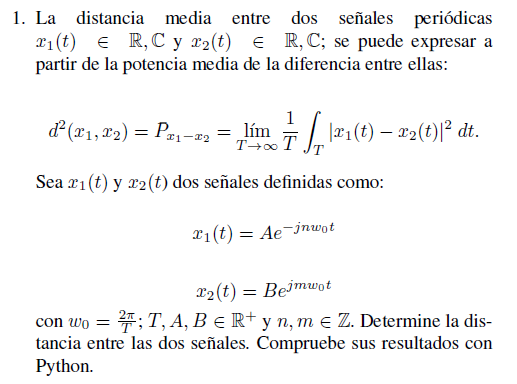

***COMPROBACION CUANDO n+m=0 Y n+m !=0***

In [134]:
import sympy as sp

# ===== Definición de símbolos =====
t, T, A, B, n, m = sp.symbols('t T A B n m', real=True, positive=True)
w0 = 2*sp.pi/T
x1,x2 =sp.symbols("x1 x2", complex= True)
n=0
m=0
# ===== Señales =====
x1 = A*sp.exp(-sp.I*n*w0*t)
x2 = B*sp.exp(sp.I*m*w0*t)

# ===== Potencia media de cada señal =====
Px1 = (1/T)*sp.integrate(sp.Abs(x1)**2, (t,0,T))   # → A^2

print(Px1)



A**2


In [72]:

Px2 =(1/T)*sp.integrate(sp.Abs(x2)**2, (t,0,T))
    # → B^2
Px2



B**2

**termino** **cruzado**

In [65]:
#cuando n+m =0
c=0
w0 = 2*sp.pi/T
C12 = (-A*B/T)*sp.integrate(2*sp.cos((0)*w0*t), (t,0,T))
Px1+Px2+C12

A**2 - 2*A*B + B**2

In [126]:
#cuando n+m!=0
I = sp.sin((n+m)*w0*t) / ((n+m)*w0)

# Ahora evalúas los límites de 0 a T
evaluada = I.subs(t, T) - I.subs(t, 0)

# Si quieres, multiplicas por el factor constante que tenías afuera
C12 = (-2*A*B/T) * evaluada
sp.simplify(C12)



-A*B*sin(pi*(2*m + 2*n))/(pi*(m + n))

In [150]:
#cuando 2*m + 2*n = 2pi
d=-A*B*sp.sin(2*sp.pi)*(sp.pi*(m + n))
Px1+Px2+d

A**2 + B**2

**PUNTO 2**

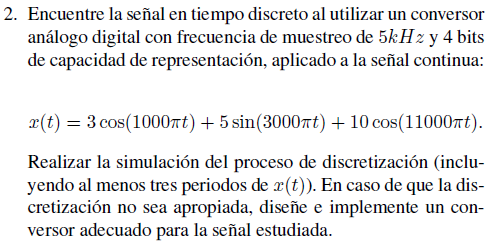

# **simulacion punto 2**
*para este ejercicio se cambio la frecuencia de muestreo por una >=11000 Hz esto debido a que con la frecuncia de muestreo propuesta en el ejercicio no se cumplio el teorema de Nyquist*::

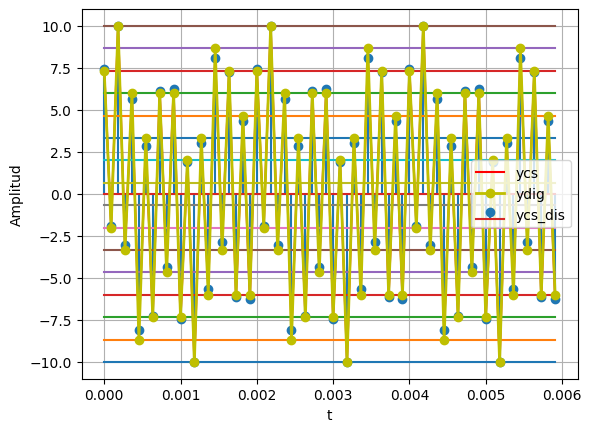

In [151]:
from os import tcsetpgrp
from scipy.spatial.distance import cdist
import numpy as np

import matplotlib.pyplot as plt




Fs=11000 #Fs de muestreo
Ts =1/Fs # periodo de muestreo
T= 1/500 # Periodo de la cuasiperiodica
t= np.arange(0,3*T,Ts)
w1=1000*np.pi
w2=3000*np.pi
w3=11000*np.pi
x=3*np.cos(w1*t)+5*np.sin(w2*t)+10*np.cos(w3*t) # creacion de nuestra señal



#crear funcion en python
Amin = -10 # valor min después de cero y pendiente
Amax = 10 # valor max después de cero y pendiente
numb=4 # numero de bits de mi targeta
ve=np.linspace(Amin,Amax,2**numb)

def my_ceropen(x,ymin, ymax): #en general se pueden definir valores por defecto
  '''
  Codigo base para simular proceso de cero y pendiente
  Se ingresa arreglo de numpy y los valores min  y max despues de cero y pendiente
  '''
  xmax = max(x) # x.max()
  xmin = min(x) # x.min()
  m = (ymax - ymin)/(xmax - xmin)
  c = ymin - m*xmin
  yv = m*x + c
  return yv

#llamado a mi funcion cero y pendiente
ycs=my_ceropen(x,Amin, Amax)

#función cuantización punto a punto

def my_cuantizador(yn, vc) : #yn punto a #cuantizar, vq vector de estados

  Ne = vc.shape[0] #tamaño vector de estados
  dn = cdist(yn.reshape(-1,1),vc.reshape(-1,1))#distancia yn a vector estados, reshape(-1,1) asegura vectores columna para poder utilizar cdist
  ind = np.argmin(dn) #posición distancia min
  return vc[ind]


#recorrer vector cero y spam discretizado para cuantizar

for i in range(ycs.shape[0]):
   if i==0: #primera muestra
     yq = my_cuantizador(ycs[i],ve)
   else:
     yq = np.append(yq,my_cuantizador(ycs[i],ve)) #apilar datos cuantizando si i>0


  #graficar señales

plt.plot(t,ycs,c='r', label='ycs')#cs continua

plt.stem(t,ycs, label='ycs_dis')#cs discreta

#estados de cuantización

for v in ve:
  plt.plot(t,v*np.ones(len(t)))

# graficar señal Digital (discreta + cuantizada)

plt.plot(t,yq,c='y',marker='o',label='ydig', linewidth=2)

plt.legend()
plt.grid()
plt.xlabel('t')
plt.ylabel('Amplitud')
plt.show()




**PUNTO 4**
Encuentre el espectro de Fourier, su parte real,
imaginaria, magnitud, fase y el error relativo para
n∈{0,±1,±2,±3,±4,±5}, a partir de x
(t) para la
señal x(t) en la Figura 1 . Compruebe el espectro obtenido
con la estimacion a partir de x(t). Presente las simulaciones
de Python respectivas.

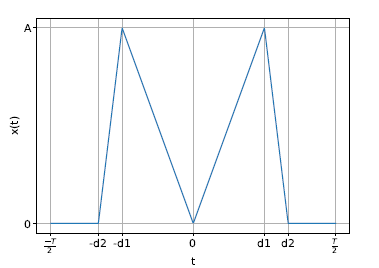

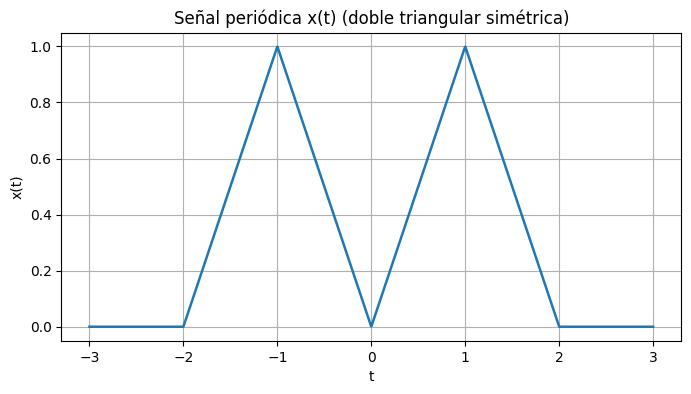

/tmp/ipython-input-3618219432.py:57: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return (1 / T) * np.trapz(integrando, t)
/tmp/ipython-input-3618219432.py:62: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return (1 / T) * np.trapz(x, t)



Coeficientes complejos Cn (n=-5..5):
 n	Re(Cn)		Im(Cn)		|Cn|		fase(rad)
-5	+1.21585e-02	+0.00000e+00	1.21585e-02	0.000
-4	-2.32009e-17	+0.00000e+00	2.32009e-17	3.142
-3	-6.75475e-02	+0.00000e+00	6.75475e-02	3.142
-2	+5.06201e-17	+0.00000e+00	5.06201e-17	0.000
-1	+3.03964e-01	+0.00000e+00	3.03964e-01	0.000
 0	+3.33333e-01	+0.00000e+00	3.33333e-01	0.000
 1	+3.03964e-01	+0.00000e+00	3.03964e-01	0.000
 2	+5.06201e-17	+0.00000e+00	5.06201e-17	0.000
 3	-6.75475e-02	+0.00000e+00	6.75475e-02	3.142
 4	-2.32009e-17	+0.00000e+00	2.32009e-17	3.142
 5	+1.21585e-02	+0.00000e+00	1.21585e-02	0.000


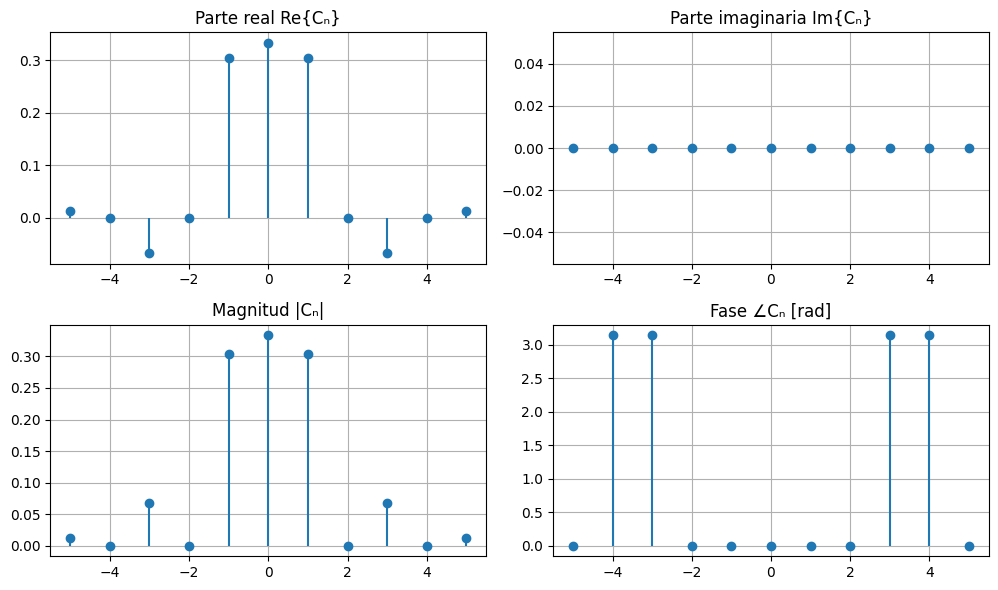

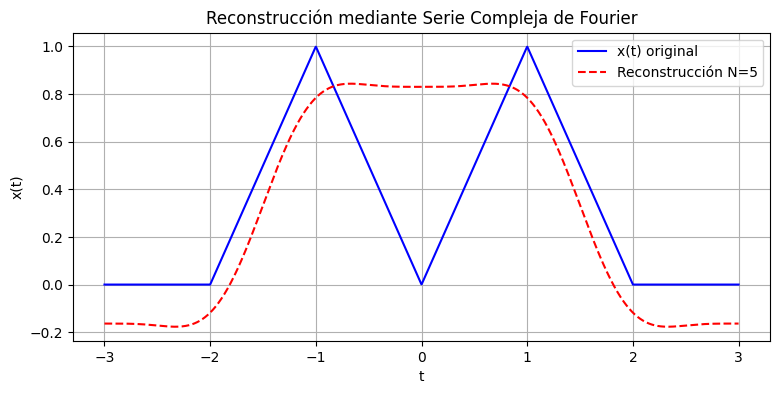

In [ ]:
"""
Reconstrucción y análisis espectral de una señal doble triangular periódica (simétrica)
"""

import numpy as np
import matplotlib.pyplot as plt

# === Parámetros ===
A = 1.0    # Amplitud máxima
T = 6.0    # Periodo
d1 = 1.0   # Pico (±d1)
d2 = 2.0   # Punto donde x(t) vuelve a cero (±d2)

# === Dominio temporal ===
t = np.linspace(-T/2, T/2, 2000)
omega0 = 2 * np.pi / T

# === Definición de x(t) según la figura ===
def x_t(t):
    t = np.array(t)
    x = np.zeros_like(t)

    # -d2 ≤ t < -d1 : rampa ascendente
    mask1 = (-d2 <= t) & (t < -d1)
    x[mask1] = A * (t[mask1] + d2) / (d2 - d1)

    # -d1 ≤ t < 0 : rampa descendente hacia 0
    mask2 = (-d1 <= t) & (t < 0)
    x[mask2] = A * (-t[mask2]) / d1

    # 0 ≤ t < d1 : rampa ascendente desde 0 a A
    mask3 = (0 <= t) & (t < d1)
    x[mask3] = A * (t[mask3]) / d1

    # d1 ≤ t < d2 : rampa descendente hasta 0
    mask4 = (d1 <= t) & (t < d2)
    x[mask4] = A * (d2 - t[mask4]) / (d2 - d1)

    # fuera de ±d2: x=0
    return x

x = x_t(t)

# === Graficar la señal ===
plt.figure(figsize=(8, 4))
plt.plot(t, x, linewidth=1.8)
plt.title("Señal periódica x(t) (doble triangular simétrica)")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.grid(True)
plt.show()

# === Cálculo de coeficientes de Fourier ===
def Cn_direct(n):
    """Coeficientes complejos de Fourier: integral directa"""
    integrando = x * np.exp(-1j * n * omega0 * t)
    return (1 / T) * np.trapz(integrando, t)

def Cn_from_second_derivative(n):
    """Coeficiente Cn obtenido desde x''(t)"""
    if n == 0:
        return (1 / T) * np.trapz(x, t)
    num = 2 * A * (np.cos(n * omega0 * d1) - np.cos(n * omega0 * d2))
    den = T * (n * omega0)**2
    return num / den  # Real, porque la señal es par

# === Calcular coeficientes para n = -5 ... 5 ===
Nmax = 5
n_values = np.arange(-Nmax, Nmax + 1)

C_direct = np.array([Cn_direct(n) for n in n_values])
C_deriv = np.array([Cn_from_second_derivative(n) for n in n_values])

# === Mostrar tabla ===
print("\nCoeficientes complejos Cn (n=-5..5):")
print(" n\tRe(Cn)\t\tIm(Cn)\t\t|Cn|\t\tfase(rad)")
for i, n in enumerate(n_values):
    mag = np.abs(C_deriv[i])
    pha = np.angle(C_deriv[i])
    print(f"{n:2d}\t{C_deriv[i].real:+.5e}\t{C_deriv[i].imag:+.5e}\t{mag:.5e}\t{pha:.3f}")

# === Graficar espectro ===
fig, axs = plt.subplots(2, 2, figsize=(10, 6))

# Parte real
axs[0, 0].stem(n_values, np.real(C_deriv), basefmt=" ")
axs[0, 0].set_title("Parte real Re{Cₙ}")
axs[0, 0].grid(True)

# Parte imaginaria
axs[0, 1].stem(n_values, np.imag(C_deriv), basefmt=" ")
axs[0, 1].set_title("Parte imaginaria Im{Cₙ}")
axs[0, 1].grid(True)

# Magnitud
axs[1, 0].stem(n_values, np.abs(C_deriv), basefmt=" ")
axs[1, 0].set_title("Magnitud |Cₙ|")
axs[1, 0].grid(True)

# Fase
axs[1, 1].stem(n_values, np.angle(C_deriv), basefmt=" ")
axs[1, 1].set_title("Fase ∠Cₙ [rad]")
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()

# === Reconstrucción de la señal ===
def reconstruccion(ti, N):
    suma = np.zeros_like(ti, dtype=complex)
    for n in range(-N, N + 1):
        suma += Cn_from_second_derivative(n) * np.exp(1j * n * omega0 * ti)
    return suma

x_rec = reconstruccion(t, 5)

plt.figure(figsize=(9, 4))
plt.plot(t, x, label="x(t) original", color='blue')
plt.plot(t, np.real(x_rec), '--r', label="Reconstrucción N=5")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.title("Reconstrucción mediante Serie Compleja de Fourier")
plt.legend()
plt.grid(True)
plt.show()
